In [1]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [3]:
fetch_olivetti_faces().data

X = faces.data
y = faces.target


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [5]:
faces.data.shape

(400, 4096)

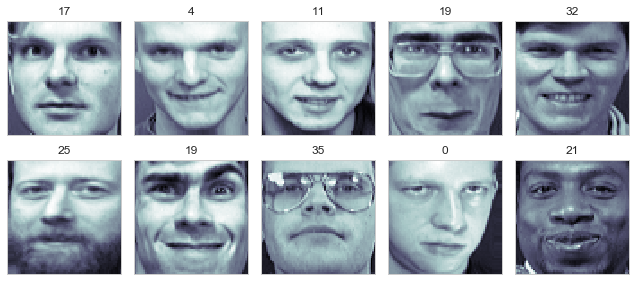

In [6]:
N=2; M=5;
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [7]:
faces.data.shape # (400, 4096) ## 400개의 데이터 4096 의 차원
faces.target.shape # (400,) ## target 400개의 데이터

(400,)

In [8]:
faces.images[0]

array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.37190083,
         0.33057851,  0.30578512],
       [ 0.3429752 ,  0.40495867,  0.43801653, ...,  0.37190083,
         0.33884299,  0.3140496 ],
       [ 0.3429752 ,  0.41735536,  0.45041323, ...,  0.38016528,
         0.33884299,  0.29752067],
       ..., 
       [ 0.21487603,  0.20661157,  0.22314049, ...,  0.15289256,
         0.16528925,  0.17355372],
       [ 0.20247933,  0.2107438 ,  0.2107438 , ...,  0.14876033,
         0.16115703,  0.16528925],
       [ 0.20247933,  0.20661157,  0.20247933, ...,  0.15289256,
         0.16115703,  0.1570248 ]], dtype=float32)

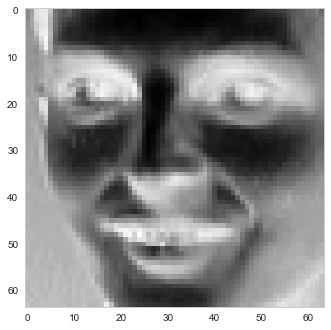

In [9]:
plt.imshow(faces.images[399]) ## 400개의 training set 있음
plt.grid(False)
plt.show()

In [ ]:
from keras.utils import np_utils


X_train = np_utils.to_categorical(X_train,40)
y_train= np_utils.to_categorical(y_train,40)
train[:5]


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential() ## 구조를 나타냄 , 구조를 어떻게 만드는지 나옴 
model.add(Dense(15, input_dim=4096, activation="sigmoid")) ## 15개 hidden layer,400 레이어, sigmoid는 로지스틱을 이야기함   
model.add(Dense(10, activation="sigmoid"))## hidden layer 10개로 셋팅
model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error', metrics=["accuracy"]) 
## IR - running rate 스텝사이즈, loss = 줄이고자 하는 것 RSS, metircs = 모니터링기준, accracy를 모니터링 하겠다 

In [ ]:
l1 = model.layers[0]
l2 = model.layers[1]

In [ ]:
l1.name

In [ ]:
%%time
hist = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=2) 
## expected dense_13_input to have shape (None, 4096) but got array with shape (1474560, 40)